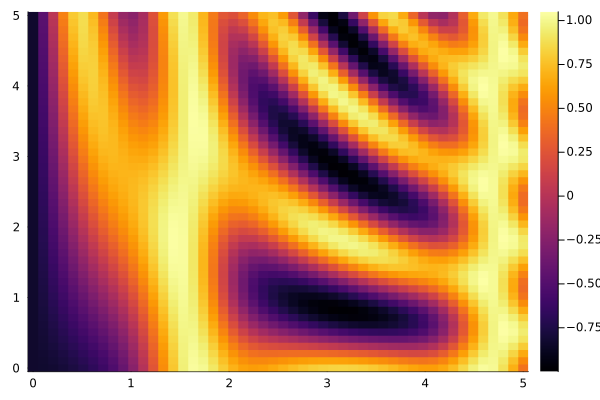

In [1]:
using Plots

x = collect(LinRange(0, 5, 50))


xx = repeat(x, 1, size(x)[1])
z = sin.(xx') .^ 10 .+ cos.(10 .+ xx' .* xx) .* cos.(xx');

heatmap(x, x, z)

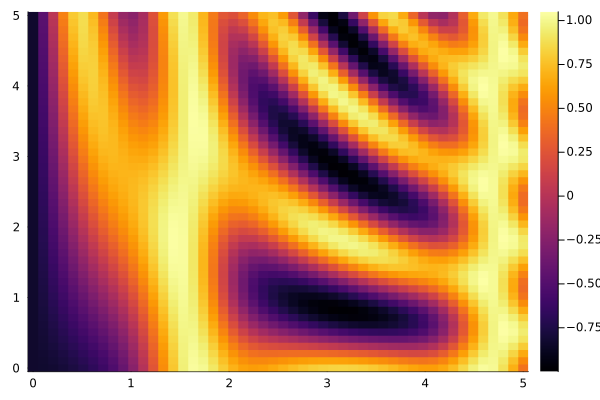

In [2]:
heatmap(x, x, z)

In [3]:
cos.(10 .+ xx' .* xx)

50×50 Matrix{Float64}:
 -0.839072  -0.839072  -0.839072    …  -0.839072   -0.839072    -0.839072
 -0.839072  -0.833362  -0.827561       -0.484853   -0.47572     -0.466536
 -0.839072  -0.827561  -0.815692       -0.0168146   0.00400921   0.0248313
 -0.839072  -0.821671  -0.80347         0.455171    0.482758     0.509874
 -0.839072  -0.815692  -0.790898        0.820305    0.843407     0.865046
 -0.839072  -0.809625  -0.777984    …   0.992872    0.997729     0.999882
 -0.839072  -0.80347   -0.764733        0.932361    0.907971     0.880038
 -0.839072  -0.797227  -0.75115         0.652979    0.596092     0.536039
 -0.839072  -0.790898  -0.737241        0.220309    0.138387     0.0555057
 -0.839072  -0.784484  -0.723012       -0.264078   -0.353171    -0.439166
 -0.839072  -0.777984  -0.70847     …  -0.686473   -0.758332    -0.821977
 -0.839072  -0.7714    -0.693621       -0.947718   -0.977978    -0.995422
 -0.839072  -0.764733  -0.67847        -0.986486   -0.958376    -0.915324
  ⋮          

In [4]:
using Random, Plots, Distributions

In [5]:
Ndist = Normal(0, 1)
X = rand(Ndist, 1000);
bins = collect(LinRange(-5, 5, 20));
i = searchsortedlast.(Ref(bins), X)

counts = zeros(size(bins))
for j in collect(1:20)
    counts[j] = sum(i .== j)
end

In [6]:
sum(i .== 19)

0

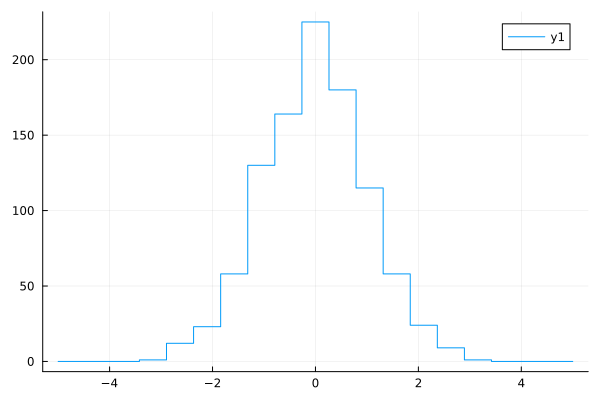

In [7]:
plot(bins, counts, line=:steppost)

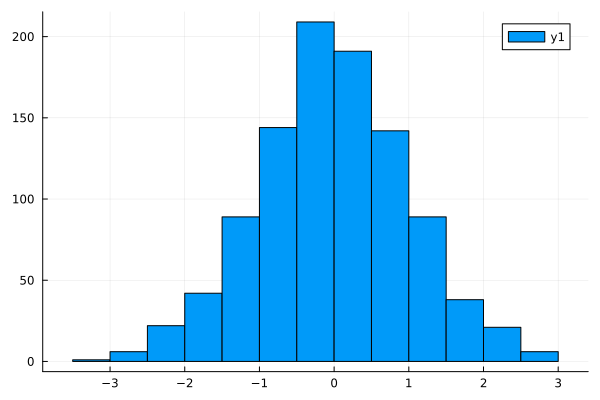

In [8]:
histogram(X, bins=19)

In [9]:
i[i.!=NaN]

1000-element Vector{Int64}:
  7
 12
 13
 11
 11
  5
  8
 10
 12
 12
  8
  9
 11
  ⋮
  8
 11
 12
 11
  8
  7
 10
  8
  9
  8
 12
  8

In [10]:
sum(i .> 20)

0

# K-nearest

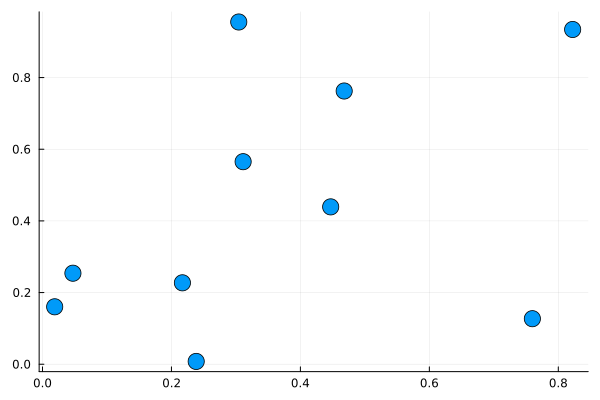

In [11]:
using Plots, Random
Random.seed!(100)

X = rand(10, 2)
scatter(X[:, 1], X[:, 2], mark=(9), legend=:none)

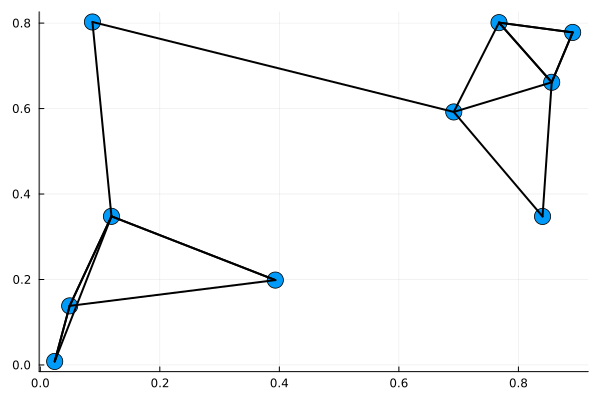

In [12]:
using Plots, Random
Random.seed!(1)

N = 10
X = rand(N, 2)

differences = fill(X, N) .- repeat.(transpose.(collect.(eachrow(X))), N)

dist_sq = sum.([i .^ 2 for i in differences], dims=2)


fig = scatter(X[:, 1], X[:, 2], mark=(9), legend=:none)
for (i, k) in enumerate(eachrow(X))
    for j in eachrow(X[partialsortperm(vec(dist_sq[i]), 2:3), :])
        # @show j
        # @show k
        plot!([k[1], j[1], NaN], [k[2], j[2], NaN], label="", c="black", line=2)
    end
end
plot(fig)

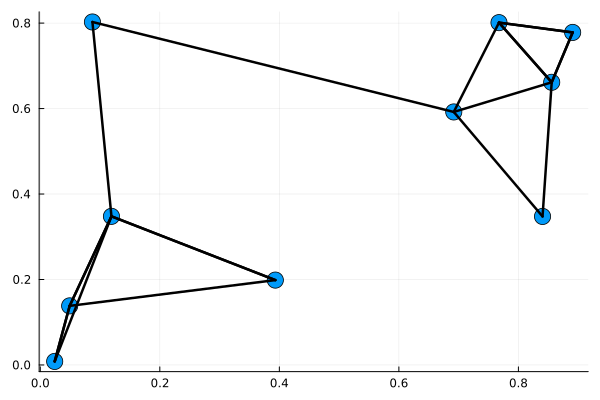

In [13]:
dist_sq = reshape(sum((repeat(X, N) .- vcat(repeat.(transpose.(collect.(eachrow(X))), N)...)) .^ 2, dims=2), (N, N))
fig = scatter(X[:, 1], X[:, 2], mark=(9), legend=:none)

for (i, k) in enumerate(eachcol(dist_sq))
    for j in partialsortperm(vec(k), 2:3)
        (x, y) = eachcol(vcat(X[i, :]', X[j, :]'))
        plot!(x, y, line=2.5, label="", color=:black)
    end
end
plot(fig)

In [34]:
data = rand(10,2)
x = [eachrow(data)...]

# broadcast
broadcast(-,data,x[1]')


10×2 Matrix{Float64}:
  0.0         0.0
  0.264645   -0.0156332
  0.327896   -0.0694204
 -0.185845    0.887
 -0.220706    0.463765
 -0.522197    0.861254
 -0.582271   -0.0742009
 -0.361442    0.0673248
  0.17711     0.531077
 -0.0719593   0.324557

In [31]:
x[1]

2-element view(::Matrix{Float64}, 1, :) with eltype Float64:
 0.3615499788077561
 0.653979624459681